Realizar el ajuste o ajustes de los modelos

Sacad la matriz de confusión de vuestro modelo e identificad cuáles son los verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos.

In [2]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns


#  Modelado y matriz de confusión
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix


#  Gestión de warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [3]:
df_travel_balanceado = pd.read_csv("data/df_travel_balanceado.csv", index_col=0)
df_travel_balanceado.sample()

,Duration,Net Sales,Age,products,agency,country,Commision_oe,Agency Type_oe,Distribution Channel_Offline,Distribution Channel_Online,Claim
56544,5.784341,0.337585,-1.314173,2,2,0,1,1,0.0,1.0,1


In [4]:
# creamos un df (x) con las variables predictivas y un dataframe (y) que tiene sólo la variable respuesta:

X = df_travel_balanceado.drop("Claim", axis = 1)
y = df_travel_balanceado["Claim"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [5]:
# definimos la regresión logistica

log_reg_esta = LogisticRegression(n_jobs=-1, max_iter = 1000)

# ajustamos el modelo
log_reg_esta.fit(X_train,y_train)

# obtenemos las predicciones para el conjunto de entrenamiento
y_pred_train_esta = log_reg_esta.predict(X_train)

# obtenemos las predicciones para el conjunto de test
y_pred_test_esta = log_reg_esta.predict(X_test)

In [6]:
train_df_esta = pd.DataFrame({'Real': y_train, 'Predicted': y_pred_train_esta, 'Set': ['Train']*len(y_train)})
test_df_esta  = pd.DataFrame({'Real': y_test,  'Predicted': y_pred_test_esta,  'Set': ['Test']*len(y_test)})
resultados = pd.concat([train_df_esta,test_df_esta], axis = 0)
display(resultados.head())
display(resultados.tail())

,Real,Predicted,Set
23253,0,0,Train
67881,1,1,Train
4181,0,1,Train
74294,1,0,Train
71625,1,1,Train


,Real,Predicted,Set
72610,1,1,Test
33793,0,0,Test
55465,1,0,Test
66317,1,1,Test
80715,1,0,Test


In [9]:
# guardamos los resultados para poder sacar las métricas

resultados.to_csv("data/df_travel_modelo.csv")

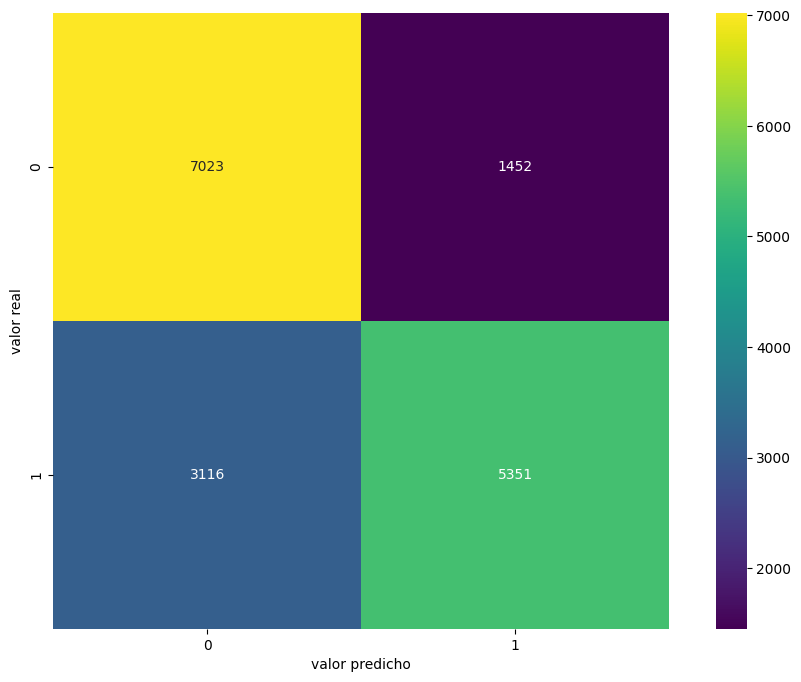

In [8]:
# sacamos la matriz de confusión:

matriz_confusion = confusion_matrix(y_test, y_pred_test_esta)

plt.figure(figsize = (12, 8))
sns.heatmap(matriz_confusion, square=True, annot=True, fmt="d", cmap = "viridis")

plt.xlabel('valor predicho')
plt.ylabel('valor real')
plt.show()

CONCLUSIONES:

0 = no reclaman

1 = sí reclaman

Verdaderos Negativos (el modelo predice que no reclaman y efectivamente no reclaman): 7023

Verdaderos Positivos (el modelo predice que reclaman y efectivamente reclaman): 5351

Falsos Positivos (el modelo predice que reclaman pero no lo hacen): 1452

Falsos Negativos (el modelo predice que no reclaman pero sí lo hacen): 3116